<a href="https://colab.research.google.com/github/conextm/python/blob/main/Regresio%CC%81n_Lineal_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Formulación de un Modelo Lineal Simple

### Caso del negocio:
Una empresa requiere determinar cual es la relación que pudiera existir entre el salario de un trabajador y sus años de experiencia.

### Planteamiento:
* Pregunta a resolver:  Determinar cual es el salario de un trabajador basado en el número de años de experiencia.
* Fuente de datos: Se cuenta con una base de datos que tiene información del salario y años de experiencia de 35 trabajadores.
* Vamos a plantear un modelo bastante simple de regresión lineal que encuentre la relación entre el salario de un trabajador y sus años de experiencia.

## Exploración de Datos

In [1]:
# Librerías para el tratamiento de los datos
import numpy as np
import pandas as pd

# Librerías para entrenamiento y modelado
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el dataset.

In [2]:
salary_data = pd.read_csv('/content/Salario.csv')

salary_data.sample(10)


,x,y
18,5.9,81363
6,3.0,60150
26,9.5,116969
33,12.9,135675
22,7.9,101302
31,11.5,126756
4,2.2,39891
0,1.1,39343
30,11.2,127345
29,10.5,121872


* La primera columna *YearsExperience* representa los años de experiencia de un trabajador individual.
* La segunda columna *Salary* representa el salario anual de un trabajador individual.


Vemos cuantos registros y columnas trae nuestro dataset;

In [3]:
salary_data.shape

(35, 2)

Tenemos 35 registros y 2 columnas.

Podemos revisar la presencia de valores nulos con la función *info()*:

In [4]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       35 non-null     float64
 1   y       35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


* El campo *YearsExperience* presenta 35 valores no nulos, es decir, presenta 35-35 = 0 valores nulos
* El campo *Salary* presenta 35 valores no nulos, es decir, tampoco presenta valores nulos


Estadística descriptiva de los datos:

In [5]:
salary_data.describe()

,x,y
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


* El promedio de numero de años de experiencia que tiene un individuo en este dataset es de 6.3 años.
* El salario (en dólares) promedio de un individuo en este dataset es de $83,945.6


Podemos examinar la presencia de *outliers* revisando la presencia de sesgos en los datos.

In [6]:
salary_data.skew()

x    0.420163
y    0.209005
dtype: float64

* El sesgo para *YearsExperience* se aproxima a cero, esto parece indicar valores asimétricos distantes de la media son poco probables
* El sesgo para *Salary* se aproxima a cero también, esto es otra indicación que no existen *outliers* en los datos de *Salary*

Revisamos de manera visual como esta distribuida la data:


Desplegamos un histograma para *YearsExperience*, y vemos que la distribución esta ligeramente sesgada hacia la derecha.

<Axes: xlabel='x', ylabel='Count'>

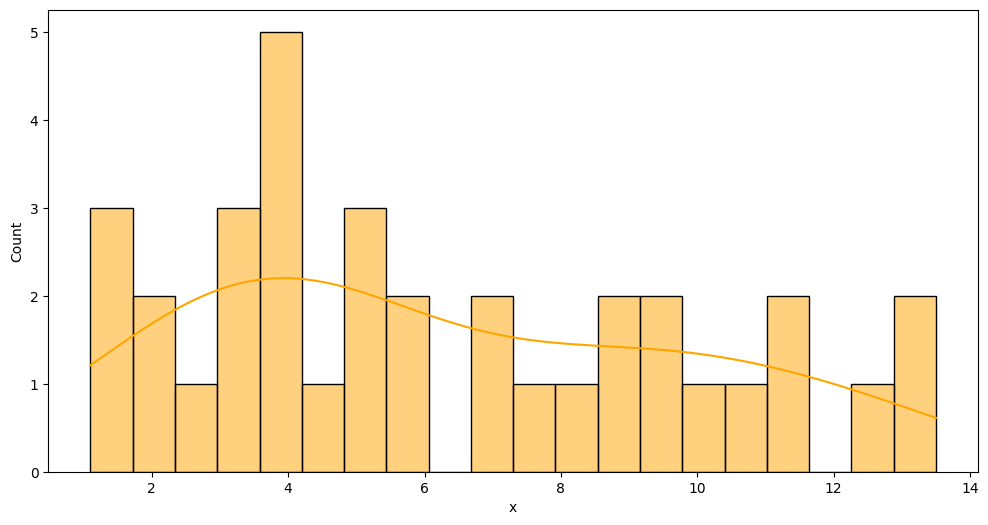

In [7]:
plt.figure(figsize = (12, 6))

sns.histplot(x = salary_data['x'], bins = 20, kde = True, color = 'orange')

* Vemos que no hay una forma clara de la distribución de *YearsExperience*, pero también podemos ver que no hay valores extremos (no hay *outliers*)
* *YearsExperience* siempre esta en el rango aprox. de 1 años a 13 años

Ahora revisamos la columna *Salary*.  Realizamos un histograma para visualizar su distribución.

<Axes: xlabel='y', ylabel='Count'>

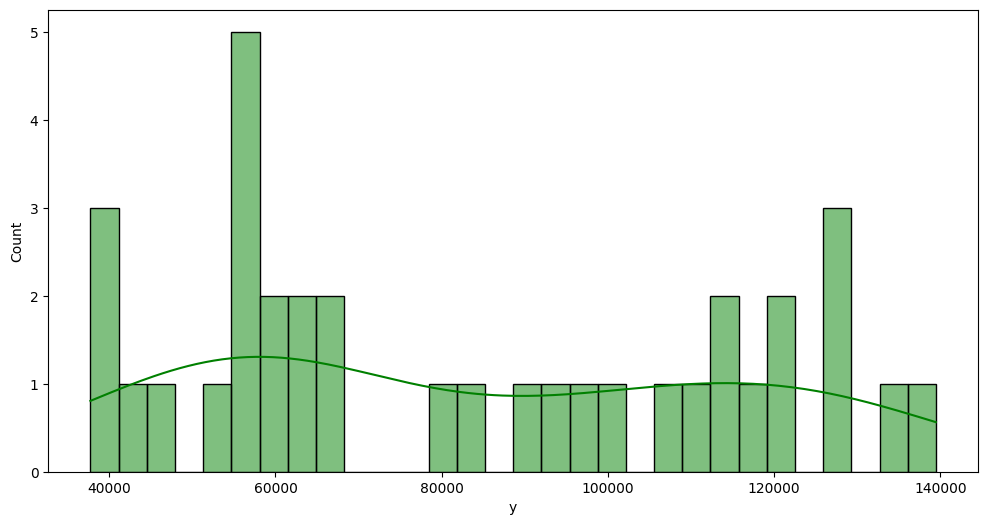

In [8]:
plt.figure(figsize = (12, 6))

sns.histplot(x = salary_data['y'], bins = 30, kde = True, color = 'green')

* Podemos observar que *Salary* tampoco tiene una distribución clara, pero de igual manera no presenta *outliers*
* La mayoría de la información de *Salary* se encuentra en el rango entre aprox. de 40,000 dólares y 114,000 dólares
* *Salary* tiene un ligero sesgo hacia la derecha.

Revisamos la representación Box Plot de *YearsExperience* para revisar cualquier *outlier*:
* El Box Plot nos da un resumen general de las estadísticas
    * La linea central del Box Plot, la *mediana* de la columna Experiencia (en años), es aprox. de 5 años.
    * La caja representa el rango intercuartil
        * El valor en el percentil 75 esta en el borde superior de la caja
        * El valor en el percentil 25 esta en el borde inferior de la caja
        * El rango intercuartil va desde los 3 años hacia los 9.5 años
* No existen *outliers* visibles en *YearsExperience*

<Axes: ylabel='x'>

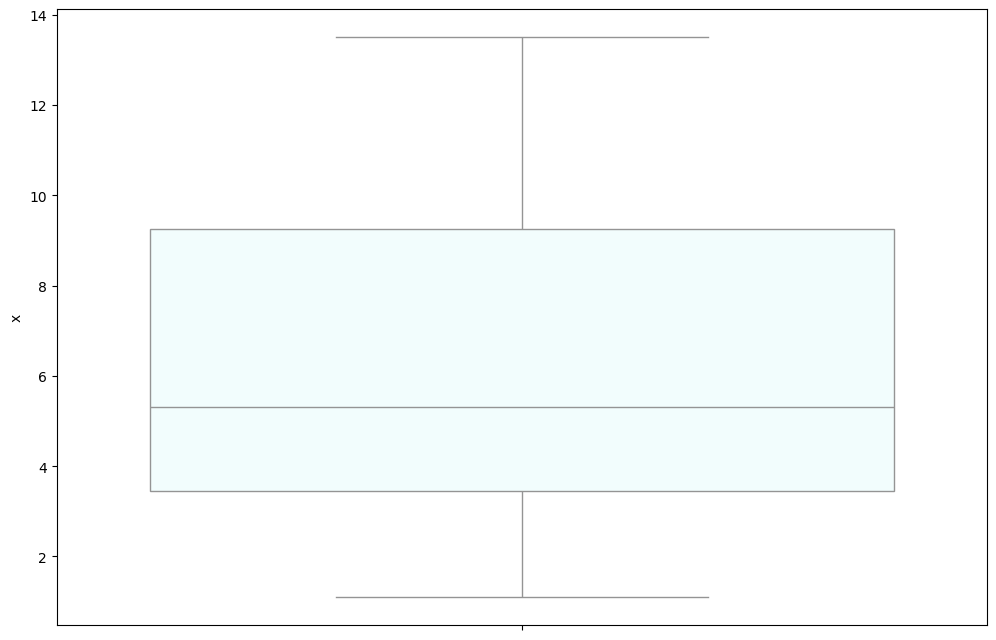

In [9]:
plt.figure(figsize = (12, 8))

sns.boxplot(y = salary_data['x'], color = 'azure')

Veamos ahora el Box Plot para *Salary*:
* Tampoco presenta *outliers* visibles
* La mediana para *Salary* es aprox. de 81,000 dólares

<Axes: ylabel='y'>

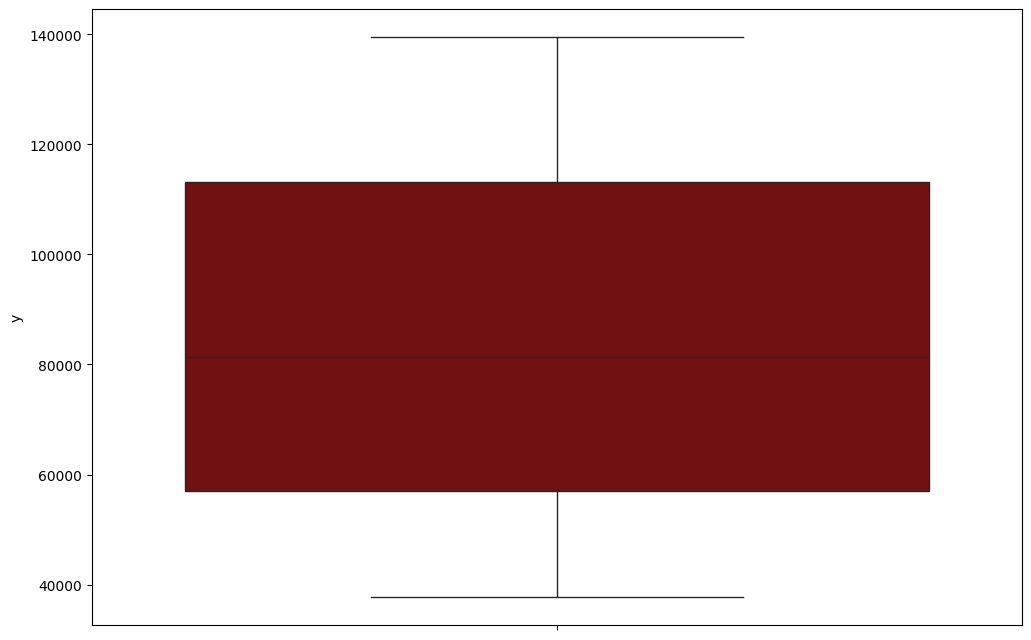

In [10]:
plt.figure(figsize = (12, 8))

sns.boxplot(y = salary_data['y'], color = 'maroon')

## Tratamiento de *outliers* y valores faltantes

* A pesar que en nuestro análisis grafico anterior no tuvimos indicación que existan *outliers*, ahora vamos a proceder hacer un análisis un poco más numérico.
* No podemos trabajar con datos faltantes o con *outliers* en nuestros análisis de regresión, por lo que necesitamos realizar el pre-procesamiento de los datos y tratar los valores faltantes y los valores atípicos (*outliers*).

### Outliers

Primero vamos a calcular el rango intercuartil.  Para ello es necesario calcular el primer cuartil y el tercer cuartil:

In [11]:
Q1 = salary_data.quantile(0.25, axis=0)

print('Primer Cuartil:')
print(Q1)

Primer Cuartil:
x        3.45
y    57019.00
Name: 0.25, dtype: float64


Tenemos un primer cuartil de 3.45 años para *YearsExperience* y aproximadamente $57,000 para *Salary*

In [12]:
Q3 = salary_data.quantile(0.75, axis = 0)

print('Tercer Cuartil:')
print(Q3)

Tercer Cuartil:
x         9.25
y    113223.50
Name: 0.75, dtype: float64


Tenemos que el tercer cuartil cae en 9.25 años para *YearsExperience* y aproximadamente $113,223 para *Salary*

Calculamos ahora el rango intercuartil (IQR) a partir de Q1 y Q3:

In [13]:
IQR = Q3 - Q1

print('Rango intercuartil:')
print(IQR)

Rango intercuartil:
x        5.8
y    56204.5
dtype: float64


Tenemos que el intercuartil para *YearsExperience* es de 5.8 años y para *Salary* es de aproximadamente $56,204.

Vamos a utilizar los valores del primer y tercer cuartil asi como el valor del rango intercuartil para ayudarnos a identificar los *outliers* en nuestros datos.

Los *outliers* son detectados utilizado el método IQR, con este método, un *Outlier* es un punto que está 1.5 veces el valor del rango intercuartil arriba del tercer cuartil o abajo del primer cuartil.

Mostramos solamente las filas que son *outliers*:

In [14]:
salary_data_outliers = salary_data[((salary_data < (Q1 - 1.5 * IQR)) |\
                                    (salary_data > (Q3 + 1.5 * IQR))).any(axis = 1)]

salary_data_outliers

,x,y


* Podemos ver que no existen *outliers* en nuestros datos, para ninguna de las columnas.
* Si fuera el caso de que efectivamente existieran *outliers*, entonces al dataframe que vamos a utilizar para entrenar nuestro modelo le deberíamos de quitar los *outliers* definidos anteriormente de la siguiente manera:

In [15]:
salary_data = salary_data[~((salary_data < (Q1 - 1.5 * IQR)) |\
                            (salary_data > (Q3 + 1.5 * IQR))).any(axis = 1)]

salary_data.shape

(35, 2)

* Vemos que permanecemos con los 35 registros, ya que no hay *outliers* que eliminar.

### Valores faltantes

* Sabemos que no hay valores faltantes, pero si fuera el caso contrario podriamos utilizar alguna técnica de imputación (media, mediana, etc.)


## Regresión Lineal

### Relación entre variables

Antes de realizar el modelo de regresión lineal, veamos la relación entre las variables *'YearsExperience'* y *'Salary'*

Text(0, 0.5, 'Salary')

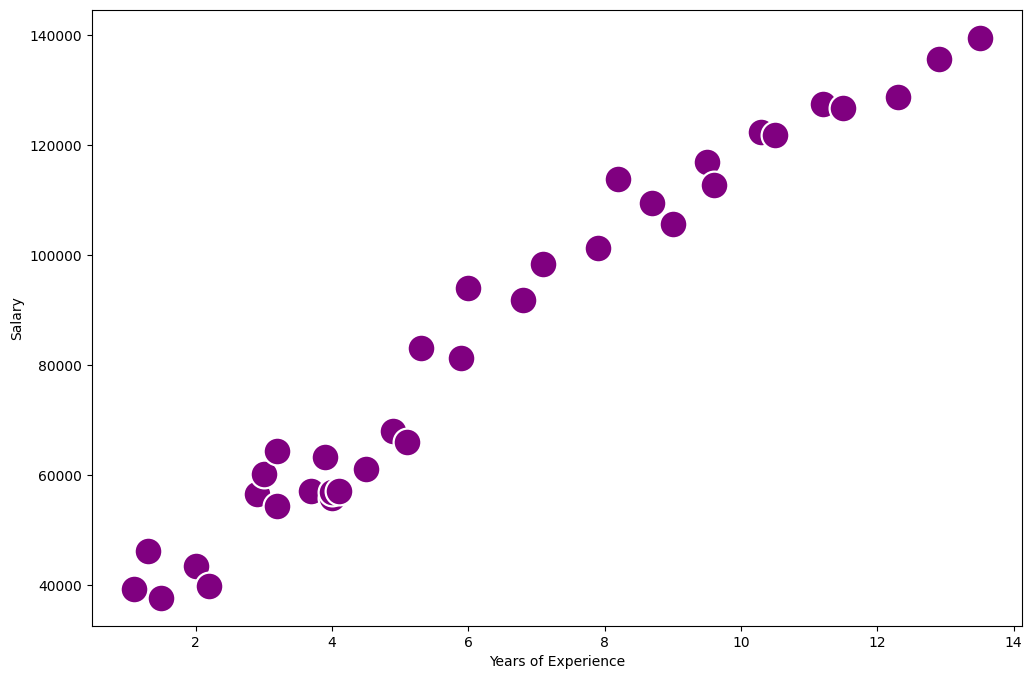

In [16]:
plt.figure(figsize = (12, 8))

sns.scatterplot(x = 'x', y = 'y',
                s = 400, color = 'purple',
                data = salary_data)

plt.xlabel('Years of Experience')
plt.ylabel('Salary')

* Podemos observar que hay una correlación alta entre *YearsExperience* y *Salary*:   
    * Entre más años de experiencia tenga un individuo más alto sera su salario.  

### Datasets de entrenamiento y de pruebas

Nuestro dataset vamos a dividirlo en datasets de entrenamiento y un dataset de pruebas:

* Utilizamos la función *train_test_split* para configurar la partición de datos que vamos a realizar
* Con el parámetro *random_state = 42*, estamos indicando a sklearn que barajee los datos asi evitamos que las particiones sigan algún tipo de patron.
* Con el parámetro *test_size = 0.3*, Estamos indicando a sklearn que utilice el 30% de nuestros datos para pruebas (para evaluar nuestro modelo).
    * 70% de los datos serán utilizados para entrenar nuestro modelo
    * 30% de los datos serán utilizados para probar nuestro modelo

In [17]:
# Dataset con las variables predictoras
X = salary_data['x']

# Dataset con la variable target
y = salary_data['y']

# Dividimos nuestro dataset en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Vemos el número de registros de variables predictoras para los datasets de entrenamiento y de pruebas:

In [18]:
X_train.shape, X_test.shape

((24,), (11,))

Vemos el número de registros de la variable target para los datasets de entrenamiento y de pruebas:

In [19]:
y_train.shape, y_test.shape

((24,), (11,))

### Modelo de Regresión Lineal

* Vamos a utilizar el modelo de regresión lineal en *scikit-learn*, para entrenar nuestro modelo de regresión lineal simple.
* El modelo de *scikit-learn* espera como entrada que los datos de entrenamiento estén en un array multidimensional, por lo tanto, en nuestro caso
  necesitamos hacer un *reshape* (remodelar) a nuestros datos.  
    * Para nuestro modelo lineal simple necesitamos un arreglo de n filas (24 filas en nuestro caso) y 1 columna

#### Reshape de los datos

In [20]:
# Convertimos los datos de entrenamiento a un array de numpy
# y luego remodelamos los datos de entrenamiento para asegurarnos que sea un arreglo multidimensional que conste de n filas y 1 columna

# Los datos de entrada de la variable predictora para el entrenamiento
X_train = X_train.to_numpy()
X_train = X_train.reshape((-1, 1))

# Los datos de entrada de la variable target para el entrenamiento
y_train = y_train.to_numpy()
y_train = y_train.reshape((-1, 1))

X_train.shape, y_train.shape

((24, 1), (24, 1))

* De la misma manera procedemos con los datos de pruebas para pasarlos a un arreglo de dos dimensiones de n filas (11 filas en nuestro caso) y 1 columna

In [21]:
# Convertimos los datos para pruebas a un array de numpy
# y luego remodelamos los datos para pruebas y asegurarnos que sea un arreglo multidimensional que conste de n filas y 1 columna

# Los datos de entrada de la variable predictora para las pruebas
X_test = X_test.to_numpy()
X_test = X_test.reshape((-1, 1))

# Los datos de entrada de la variable target para las pruebas
y_test = y_test.to_numpy()
y_test = y_test.reshape((-1, 1))

X_test.shape, y_test.shape

((11, 1), (11, 1))

#### Entrando el modelo

Con los datos de entrenamiento, creamos el modelo de regresión y lo entrenamos:

In [22]:
# Instanciamos un modelo de regresión lineal de scikit-learn
lr = LinearRegression()

# Entrenamos (ajustamos) nuestro modelo de regresión lineal con los datos de entrenamiento
linear_reg_model = lr.fit(X_train, y_train)

Vemos los *Coeficientes* e *Interceptos* obtenidos después del entrenamiento del modelo:

Nota: estos coeficientes e interceptos son los mismos que podemos obtener utilizando el método *statsmodels*


In [23]:
# Coeficientes del modelo de regresión lineal
linear_reg_model.coef_

array([[8555.33918938]])

* Tenemos solamente un coeficiente y corresponde al predictor *YearsExperience*.
* El hecho de que este coeficiente sea positivo indica que existe una correlación positiva entre los años de experiencia (*YearsExperience*) y el salario (*Salary*)
    * Entre más alto sea el número de años de experiencia (*YearsExperience*) más alto será el salario (*Salary*)
* Este coeficiente nos indica la taza de cambio entre el salario y los años de experiencia.
    * Por cada unidad aumentada o disminuida en la variable predictora, nos indica el aumento o disminución correspondiente en el target
    * En nuestro caso, por cada año mas de experiencia, el salario aumenta aprox. $8,555

In [24]:
# Interceptos del modelo de regresión lineal
linear_reg_model.intercept_

array([29602.07353482])

* Tenemos el intercepto y nos indica el valor del salario (target *Salary*) cuando se tiene 0 años de experiencia (predictor *YearsExperience*=0)
* Vemos que el intercepto también es un valor positivo.

#### Probando y Evaluando el modelo

Ahora con nuestro modelo ya ajustado, lo probamos haciendo predicciones sobre nuestros datos de prueba:

In [25]:
# Realizamos predicciones con nuestro modelo de regresión utilizando los datos de prueba
y_pred = linear_reg_model.predict(X_test)

# Mostramos las primeras cinco estimaciones obtenidas
y_pred[:5]

array([[110877.79583392],
       [ 64678.96421127],
       [104033.52448241],
       [ 90344.98177941],
       [ 71523.23556278]])

Evaluamos el puntaje (*score*) de nuestro modelo sobre los datos de entrenamiento:

In [26]:
print('Puntaje del modelo de regresión sobre los datos de entrenamiento: ', linear_reg_model.score(X_train, y_train))

Puntaje del modelo de regresión sobre los datos de entrenamiento:  0.9755630578296774


* Vemos un puntaje alto cerca del 97%.   
    * Es decir, nuestro modelo explica cerca del 97% de la varianza en nuestros datos.
* El puntaje es el valor de la *métrica R-Cuadrado* (*R-Square*) de nuestro modelo de regresión lineal sobre los datos de entrenamiento

Ahora, Evaluamos el puntaje de nuestro modelo sobre los datos de pruebas:

In [27]:
print('Puntaje del modelo de regresión sobre los datos de pruebas: ', linear_reg_model.score(X_test, y_test))

Puntaje del modelo de regresión sobre los datos de pruebas:  0.9171426108885095


* Vemos un puntaje (R-Cuadrado) alto cerca del 91%.  Un poco más bajo que el que obtuvimos con los datos de entrenamiento, y esto es normal.
* Este puntaje nos indica el desempeño de nuestro modelo sobre datos nuevos que nunca ha visto.


Ahora realizamos un gráfico del modelo de regresión lineal que fue ajustado/entrenado sobre los datos de entrenamiento:
* Vamos a graficar un scatter plot de los puntos de datos de entrenamiento en color naranja
* Y luego graficamos un linea ajustada (tambien sobre los datos de entrenamiento) que represente nuestro modelo de regresión lineal: Y = coef*X + intercept

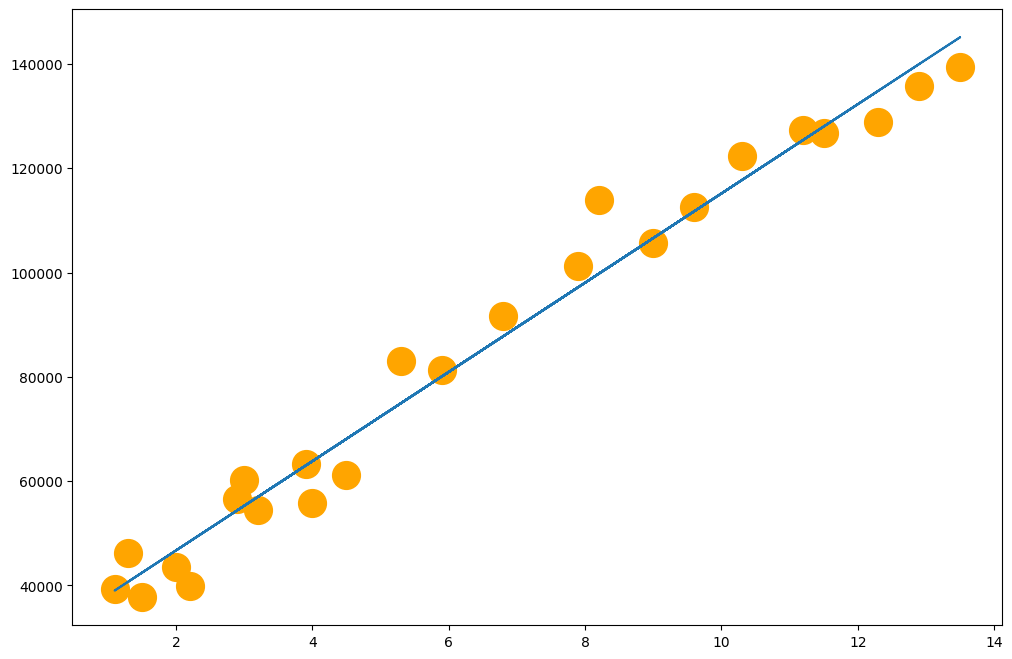

In [28]:
f, ax = plt.subplots(figsize = (12, 8))

# graficamos los puntos de datos de entrenamiento en color naranja
plt.plot(X_train, y_train, 'o', markersize = 20, color = 'orange')
# graficamos una linea utilizando nuestro modelo de regresión lineal sobre los datos predictores de entrenamiento
plt.plot(X_train , linear_reg_model.coef_ * X_train + linear_reg_model.intercept_)

Podemos ver que la linea se ajusta bastante bien a los puntos.

Realizamos un gráfico del modelo de regresión lineal que fue ajustado/entrenado pero ahora sobre los datos de pruebas:

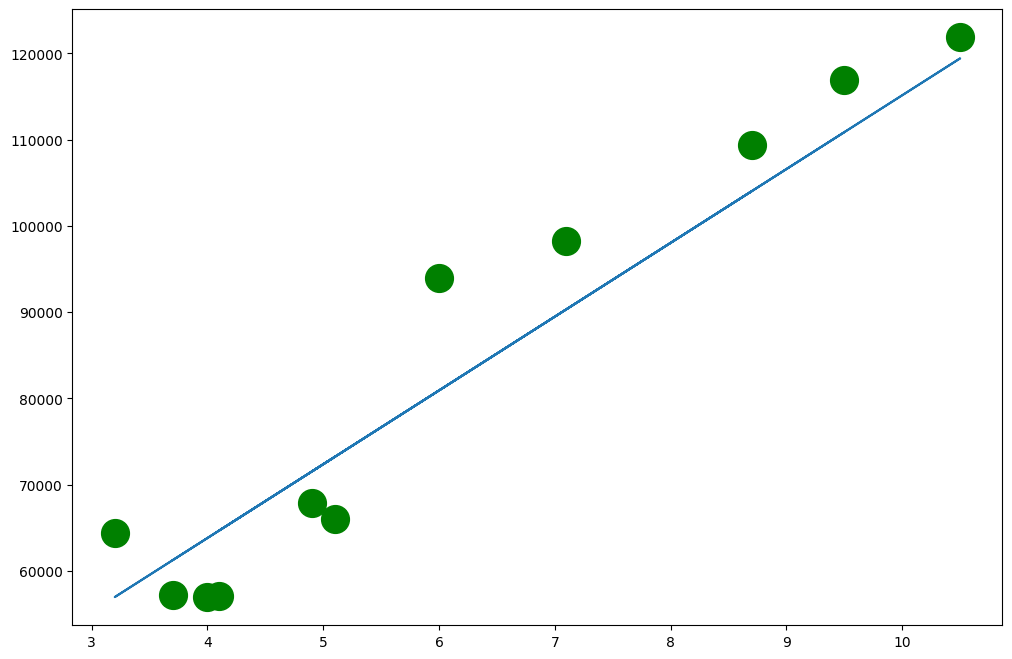

In [29]:
f, ax = plt.subplots(figsize = (12, 8))

# graficamos los puntos de datos de pruebas en color verde
plt.plot(X_test, y_test, 'o', markersize = 20, color = 'green')
# graficamos una linea utilizando nuestro modelo de regresión lineal sobre los datos predictores de pruebas
plt.plot(X_test , linear_reg_model.coef_ * X_test + linear_reg_model.intercept_)

Podemos ver que acá la linea tambien se ajusta muy bien a los datos.